In [141]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [142]:
df = pd.read_csv('data/유튜브순위.csv')
df.tail()


,카테고리,채널명,구독자수,조회수,영상수
995,게임,OGN,"510,000","608,880,000","27,433"
996,미분류,밉지않은 관종언니,"510,000","67,950,000",170
997,게임,미소,"510,000","210,780,000","3,084"
998,음식/요리/레시피,Muggo,"510,000","183,720,000","1,388"
999,게임,임선비,"510,000","234,290,000","1,134"


In [143]:
#조회수 , 지우기 replcae
x='64,300'
x.replace(',','')


'64300'

In [144]:
df.구독자수[:-1].apply(lambda x : int(x.replace(',','')))
df.tail()

,카테고리,채널명,구독자수,조회수,영상수
995,게임,OGN,"510,000","608,880,000","27,433"
996,미분류,밉지않은 관종언니,"510,000","67,950,000",170
997,게임,미소,"510,000","210,780,000","3,084"
998,음식/요리/레시피,Muggo,"510,000","183,720,000","1,388"
999,게임,임선비,"510,000","234,290,000","1,134"


In [145]:
def string2int(x):
    return int(x.replace(',',''))

In [146]:
df['조회수'] = df.조회수.apply(string2int)
df['영상수'] = df.영상수.apply(string2int)
df['구독자수'] = df.구독자수.apply(string2int)
df.tail()

,카테고리,채널명,구독자수,조회수,영상수
995,게임,OGN,510000,608880000,27433
996,미분류,밉지않은 관종언니,510000,67950000,170
997,게임,미소,510000,210780000,3084
998,음식/요리/레시피,Muggo,510000,183720000,1388
999,게임,임선비,510000,234290000,1134


## 비디오수 top 20(채널명, 빋오수) 막대그래프

In [147]:
df.sort_values('조회수',ascending=False).head()

,카테고리,채널명,구독자수,조회수,영상수
3,음악/댄스/가수,SMTOWN,28500000,21895380000,3729
6,음악/댄스/가수,1theK (원더케이),23200000,20606650000,14986
0,음악/댄스/가수,BLACKPINK,64100000,19018090000,371
1,음악/댄스/가수,HYBE LABELS,60400000,18735840000,654
26,뉴스/정치/사회,MBCentertainment,8380000,14323880000,85431


In [148]:
df2 = df.sort_values('영상수',ascending=False).head(20)
df2

,카테고리,채널명,구독자수,조회수,영상수
154,뉴스/정치/사회,YTN news,2500000,5462390000,553462
706,뉴스/정치/사회,연합뉴스TV,700000,918130000,362555
59,TV/방송,SBS Drama,5480000,5750870000,340878
56,TV/방송,SBS Entertainment,5720000,6664750000,216725
337,뉴스/정치/사회,KBS News,1320000,1844530000,176159
968,뉴스/정치/사회,Arirang News,530000,237800000,123984
244,뉴스/정치/사회,JTBC News,1710000,2409660000,116553
290,뉴스/정치/사회,MBCNEWS,1500000,3383580000,115414
112,TV/방송,KBS Drama,3470000,4261110000,114095
230,뉴스/정치/사회,SBS 뉴스,1780000,2672520000,111308


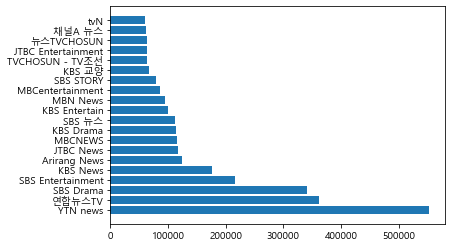

In [149]:
x = df2.채널명
y = df2.영상수
plt.barh(x,y)
plt.show()

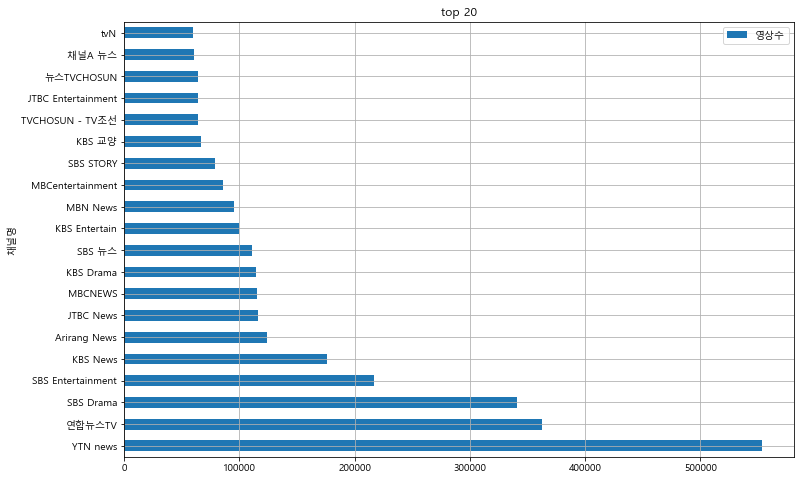

In [150]:
df3 = df[['채널명', '영상수']].sort_values('영상수', ascending=False)
df3.set_index('채널명', inplace=True)
df3.head(20).plot(kind='barh', grid=True, figsize=(12,8))
plt.title('top 20')
plt.show()

C:\Users\TH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


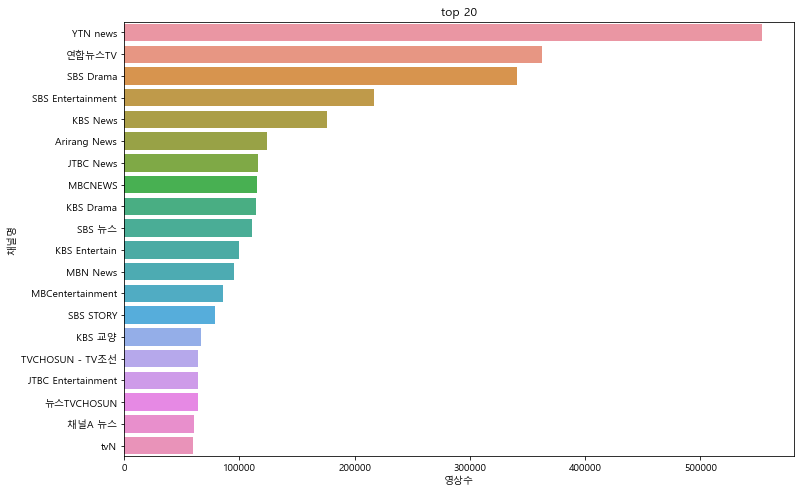

In [151]:
plt.figure(figsize=(12,8))
sns.barplot(y,x,data=df2) # x y 바꿔주면 bar barh 모습으로 바꿀수있다
plt.title('top 20')

plt.show()

## 조회수 기준 top 20 시각화

In [152]:
df_v=df.sort_values('조회수', ascending=False)
df_v.tail()

,카테고리,채널명,구독자수,조회수,영상수
16,키즈/어린이,Nao FunFun,10800000,3900000,34
156,키즈/어린이,ToyFamily,2470000,360000,38
897,음악/댄스/가수,SUGA - Topic,570000,10000,1
832,패션/미용,슈스스TV,610000,0,0
315,음식/요리/레시피,엠브로 MBRO,1410000,0,0


C:\Users\TH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


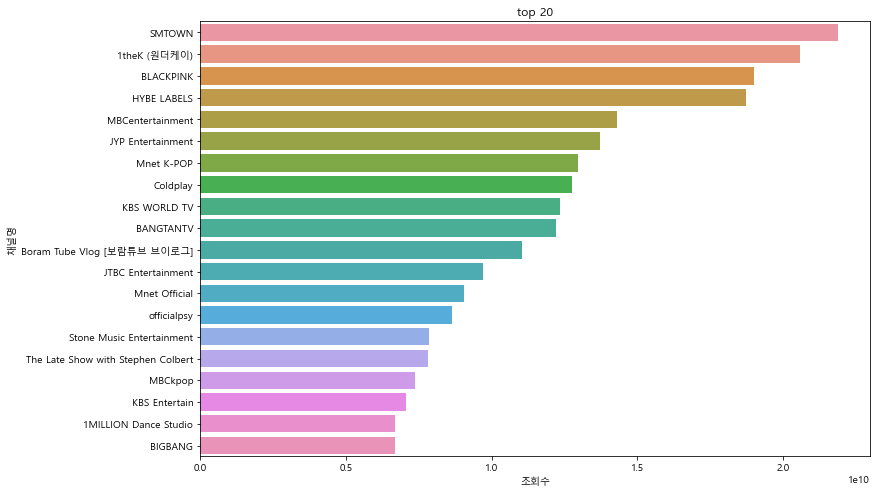

In [153]:
plt.figure(figsize=(12,8))
sns.barplot('조회수', '채널명',data=df_v.head(20)) # x y 바꿔주면 bar barh 모습으로 바꿀수있다
plt.title('top 20')
plt.show()

## 카테고리별 채널수 분포


In [154]:
cdf = df.카테고리.value_counts().to_frame()
cdf

,카테고리
음악/댄스/가수,171
TV/방송,146
미분류,114
키즈/어린이,88
음식/요리/레시피,85
게임,74
BJ/인물/연예인,71
뉴스/정치/사회,53
패션/미용,44
취미/라이프,38


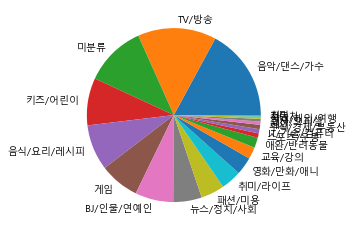

In [155]:
plt.pie(cdf.카테고리, labels=cdf.index)
plt.show()

## 카테고리별 구독자수 합계 시각화

In [168]:
df4 = df[['카테고리', '구독자수']].groupby('카테고리').agg(['count', 'sum'])
df4.columns =['채널수', '구독자 합계']
df4
df4.sort_values('구독자 합계', ascending=False, inplace=True)

In [160]:
df4.head()

,채널수,구독자 합계
카테고리,,
음악/댄스/가수,171,674550000
키즈/어린이,88,257790000
TV/방송,146,229800000
음식/요리/레시피,85,180620000
미분류,114,143460000


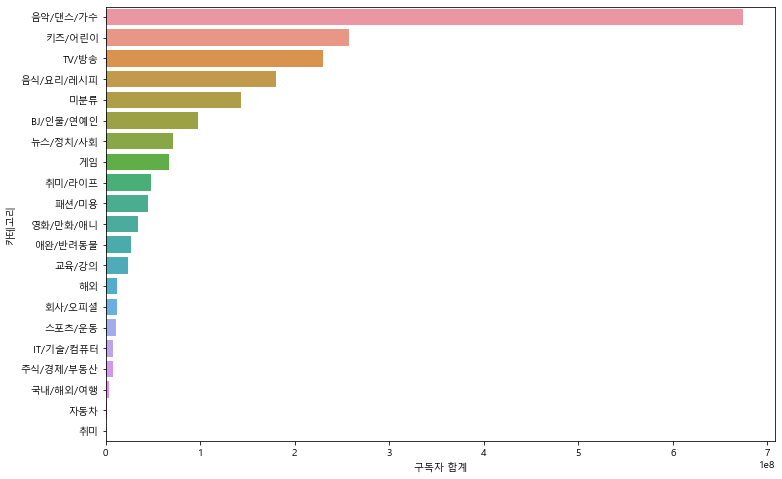

In [171]:
plt.figure(figsize=(12,8))
sns.barplot(x='구독자 합계', y=df4.index, data=df4)
plt.show()